In [ ]:
!pip install scikit-learn-extra
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/total4.csv")
df_barplot = df.copy()
df.head()

,name,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,stance_x,date_of_birth_x,significant_strikes_landed_per_minute_x,...,average_submissions_attempted_per_15_minutes_x,association,Win-Loss-Draw,Win %,weight_class_2,idh_nasc,idh_mais_recente,Region,Code,country_y
0,Robert Drysdale,7,0,0,190.50,92.99,190.50,Orthodox,1981,0.00,...,21.9,NaN,7-0-0.,1.000000,Peso Meio-Pesado,0.889,0.927,North America,USA,United States
1,Paul Ruiz,7,4,0,167.64,61.23,167.64,NaN,1986,1.40,...,20.9,NaN,7-4-0.,0.636364,Peso Galo,0.889,0.927,North America,USA,United States
2,Gerald Strebendt,9,7,0,175.26,70.31,175.26,Orthodox,1979,0.00,...,16.4,NaN,9-7-0.,0.562500,Peso Leve,0.889,0.927,North America,USA,United States
3,Neil Grove,12,8,1,198.12,120.2,198.12,Orthodox,1971,0.00,...,14.3,NaN,12-8-1.,0.595238,Peso Pesado,NaN,NaN,NaN,NaN,England
4,Raphael Butler,9,2,1,190.50,118.39,190.50,NaN,1986,4.69,...,14.1,NaN,9-2-1.,0.791667,Peso Pesado,0.889,0.927,North America,USA,United States


In [ ]:
categories_column = df.select_dtypes(include = "object").columns
categories_column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   name                                            2495 non-null   object 
 1   wins_x                                          2495 non-null   int64  
 2   losses_x                                        2495 non-null   int64  
 3   draws_x                                         2495 non-null   int64  
 4   height_cm_x                                     2495 non-null   float64
 5   weight_in_kg_x                                  2495 non-null   object 
 6   reach_in_cm_x                                   2495 non-null   float64
 7   stance_x                                        2118 non-null   object 
 8   date_of_birth_x                                 2495 non-null   int64  
 9   significant_strikes_landed_per_minute_x  

In [ ]:
df["weight_in_kg_x"] = pd.to_numeric(df.weight_in_kg_x, errors='coerce')
categories_column = df.select_dtypes(include = "object").columns

df = df.drop(['date_of_birth_x', 'Win-Loss-Draw', 'association', 'name'], axis = 1)

#dropar as colunas de nome e Win-Loss-Draw
#tentar isso em casa: pip uninstall -y enum34
#Para consertar a coluna weight_in_kg_x: https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float
#https://scikit-learn-extra.readthedocs.io/en/stable/auto_examples/plot_kmedoids.html


In [ ]:
#transformação atributos categóricos
enc = OneHotEncoder(sparse_output=False)
le = LabelEncoder()
categories_column = df.select_dtypes(include = "object").columns #para extrair colunas com variáveis qualitativas
one_hot_categories = ['Region', 'Code', 'country_y', 'stance_x']
label_categories = []

#label encode --> para variáveis com definição
for coluna in categories_column:
# **Tarefa 1 - Pré-processamento**
  if coluna not in one_hot_categories:
    df[coluna] = le.fit_transform(df[coluna])

#hot enconde --> para variáveis sem definição
one_hot_encoded = enc.fit_transform(df[one_hot_categories])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=enc.get_feature_names_out(one_hot_categories))
df_encoded = pd.concat([df.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1) #aqui a gnt concatena com o df original
df_encoded = df_encoded.drop(one_hot_categories, axis=1) #tira as colunas originais

#normalização dos dados
numer = df_encoded[['wins_x', 'losses_x', 'draws_x', 'height_cm_x', 'weight_in_kg_x', 'reach_in_cm_x', 'significant_strikes_landed_per_minute_x' , 'significant_striking_accuracy_x',
                    'significant_strikes_absorbed_per_minute_x', 'significant_strike_defence_x', 'average_takedowns_landed_per_15_minutes_x', 'takedown_accuracy_x', 'takedown_defense_x',
                    'average_submissions_attempted_per_15_minutes_x', 'Win %', 'idh_nasc', 'idh_mais_recente']]
categ = df_encoded.drop(['wins_x', 'losses_x', 'draws_x', 'height_cm_x', 'weight_in_kg_x', 'reach_in_cm_x', 'significant_strikes_landed_per_minute_x' , 'significant_striking_accuracy_x',
                    'significant_strikes_absorbed_per_minute_x', 'significant_strike_defence_x', 'average_takedowns_landed_per_15_minutes_x', 'takedown_accuracy_x', 'takedown_defense_x',
                    'average_submissions_attempted_per_15_minutes_x', 'Win %', 'idh_nasc', 'idh_mais_recente'], axis = 1)

numer.head()


,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,significant_strikes_landed_per_minute_x,significant_striking_accuracy_x,significant_strikes_absorbed_per_minute_x,significant_strike_defence_x,average_takedowns_landed_per_15_minutes_x,takedown_accuracy_x,takedown_defense_x,average_submissions_attempted_per_15_minutes_x,Win %,idh_nasc,idh_mais_recente
0,7,0,0,190.50,92.99,190.50,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,1.000000,0.889,0.927
1,7,4,0,167.64,61.23,167.64,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,0.636364,0.889,0.927
2,9,7,0,175.26,70.31,175.26,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0.562500,0.889,0.927
3,12,8,1,198.12,120.20,198.12,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3,0.595238,NaN,NaN
4,9,2,1,190.50,118.39,190.50,4.69,45.0,0.94,91.0,0.00,0.0,100.0,14.1,0.791667,0.889,0.927


In [ ]:
categ.head()

,weight_class_2,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Region_nan,Code_AFG,Code_ARE,...,country_y_Uruguay,country_y_Uzbekistan,country_y_Venezuela,country_y_Wales,stance_x_Open Stance,stance_x_Orthodox,stance_x_Sideways,stance_x_Southpaw,stance_x_Switch,stance_x_nan
0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
l_colunas = []
for coluna in numer.columns:
  l_colunas.append(coluna)

scaler = MinMaxScaler()
numer = scaler.fit_transform(numer.to_numpy())
numer = pd.DataFrame(numer, columns = l_colunas)

df_scaled = pd.concat([numer, categ], axis=1, join='inner')

df_clst = df_scaled.copy()

df_scaled.head()




,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,significant_strikes_landed_per_minute_x,significant_striking_accuracy_x,significant_strikes_absorbed_per_minute_x,significant_strike_defence_x,...,country_y_Uruguay,country_y_Uzbekistan,country_y_Venezuela,country_y_Wales,stance_x_Open Stance,stance_x_Orthodox,stance_x_Sideways,stance_x_Southpaw,stance_x_Switch,stance_x_nan
0,0.027668,0.000000,0.000000,0.682023,0.140029,0.655951,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.027668,0.075472,0.000000,0.324300,0.033455,0.311903,0.126927,0.33,0.046667,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.035573,0.132075,0.000000,0.443541,0.063924,0.426586,0.000000,0.00,0.133333,0.38,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.047431,0.150943,0.090909,0.801265,0.231335,0.770634,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.035573,0.037736,0.090909,0.682023,0.225261,0.655951,0.425204,0.45,0.031333,0.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_nulos = df_clst.isnull()
for coluna in df_nulos:
  if df_nulos[coluna].any():
    df_clst[coluna] = df_clst[coluna].fillna(0)

df_clst.head()

,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,significant_strikes_landed_per_minute_x,significant_striking_accuracy_x,significant_strikes_absorbed_per_minute_x,significant_strike_defence_x,...,country_y_Uruguay,country_y_Uzbekistan,country_y_Venezuela,country_y_Wales,stance_x_Open Stance,stance_x_Orthodox,stance_x_Sideways,stance_x_Southpaw,stance_x_Switch,stance_x_nan
0,0.027668,0.000000,0.000000,0.682023,0.140029,0.655951,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.027668,0.075472,0.000000,0.324300,0.033455,0.311903,0.126927,0.33,0.046667,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.035573,0.132075,0.000000,0.443541,0.063924,0.426586,0.000000,0.00,0.133333,0.38,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.047431,0.150943,0.090909,0.801265,0.231335,0.770634,0.000000,0.00,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.035573,0.037736,0.090909,0.682023,0.225261,0.655951,0.425204,0.45,0.031333,0.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
kmedoid1 = KMedoids(n_clusters=4, random_state = 7).fit(df_clst)
score_k1 = silhouette_score(df_clst, kmedoid1.fit_predict(df_clst))
print("Para 4 clusters, silhouette score é {}".format(score_k1))



Para 4 clusters, silhouette score é 0.03135359260511239


Por mais que com o cluster de k = 4, não alcançe a melhor métrica, para um cluster de k = 12, não é possível interpretar os dados satisfatoriamente

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

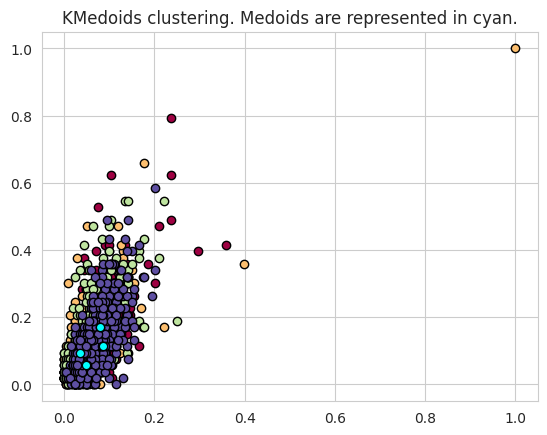

In [ ]:
labels = kmedoid1.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = df_clst[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoid1.cluster_centers_[:, 0],
    kmedoid1.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

Apenas testando se minha hipótese estava correta:

In [ ]:
unique_labels = set(labels)
len(unique_labels)

4

In [ ]:
df_kmedoid = df_clst.copy()

clusters = kmedoid1.fit_predict(df_kmedoid)
df_kmedoid['clusters'] = clusters
# print(df_kmeans)
df_kmedoid[df_kmedoid['clusters'] == 0].shape
df_kmedoid[df_kmedoid['clusters'] == 1].shape
df_kmedoid[df_kmedoid['clusters'] == 2].shape
df_kmedoid[df_kmedoid['clusters'] == 3].shape

NameError: name 'df_clst' is not defined

In [ ]:
print(df_kmedoid.columns.get_loc("Win %"))
print(df_kmedoid.columns.get_loc("idh_mais_recente"))
print(df_kmedoid.columns.get_loc("idh_nasc"))
print(df_kmedoid.columns.get_loc("height_cm_x"))

14
16
15
3


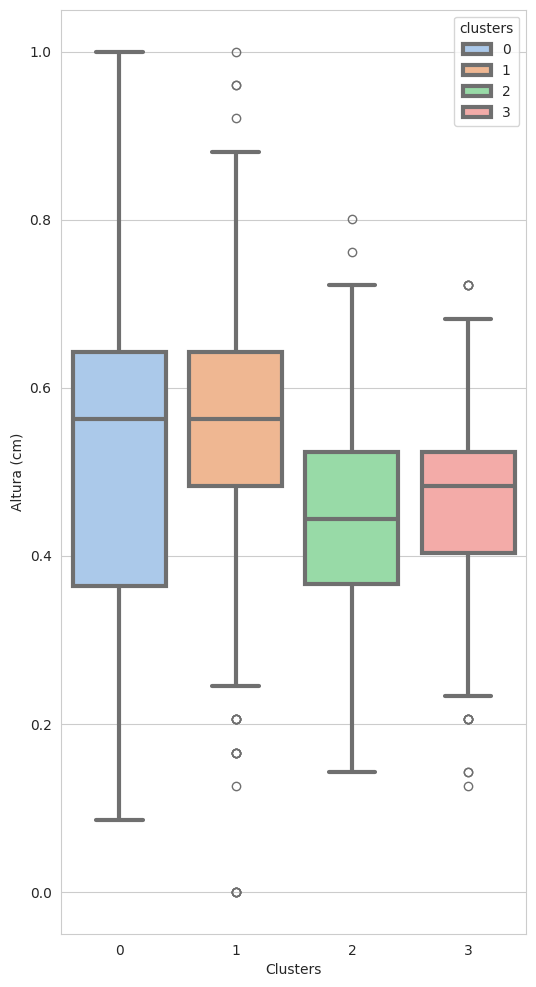

In [ ]:
plt.figure(figsize =(6, 12))

sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x = "clusters", y ="height_cm_x",data = df_kmedoid,
                  hue = "clusters",linewidth=3, palette = "pastel")

# Adicionando Título ao gráfico
plt.xlabel("Clusters")
plt.ylabel("Altura (cm)")

plt.show()

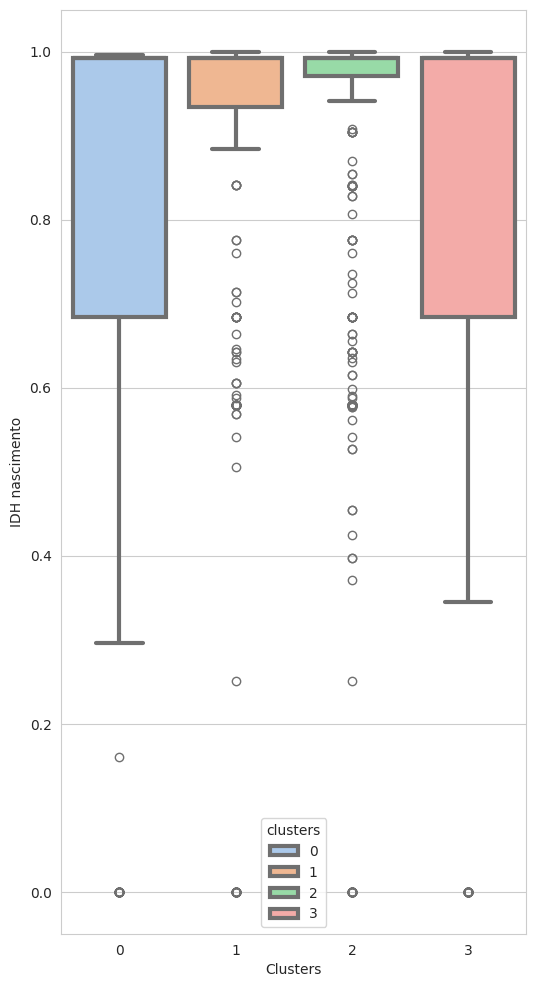

In [ ]:
plt.figure(figsize =(6, 12))

sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x = "clusters", y ="idh_nasc",data = df_kmedoid,
                  hue = "clusters",linewidth=3, palette = "pastel")

# Adicionando Título ao gráfico
plt.xlabel("Clusters")
plt.ylabel("IDH nascimento")

plt.show()

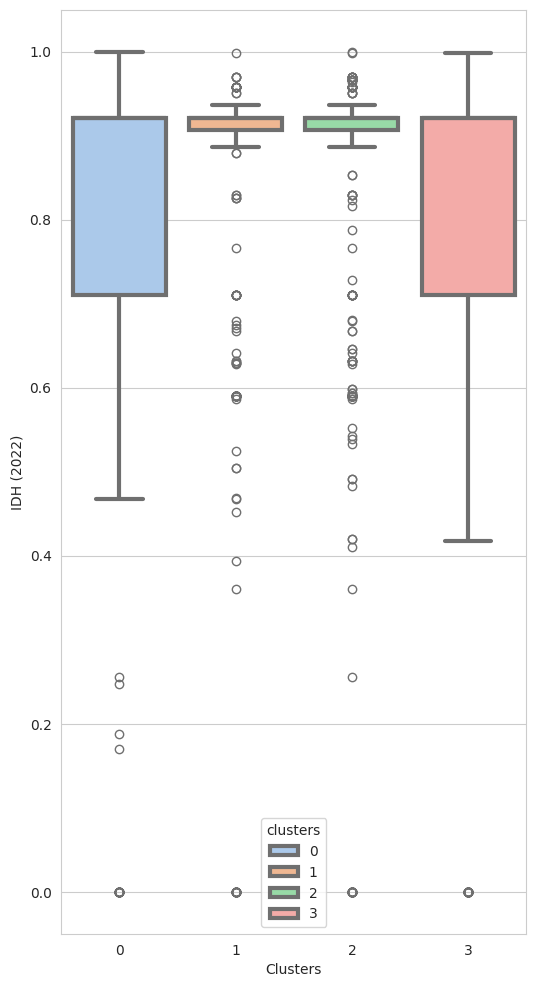

In [ ]:
plt.figure(figsize =(6, 12))

sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x = "clusters", y ="idh_mais_recente",data = df_kmedoid,
                  hue = "clusters",linewidth=3, palette = "pastel")

# Adicionando Título ao gráfico
plt.xlabel("Clusters")
plt.ylabel("IDH (2022)")

plt.show()

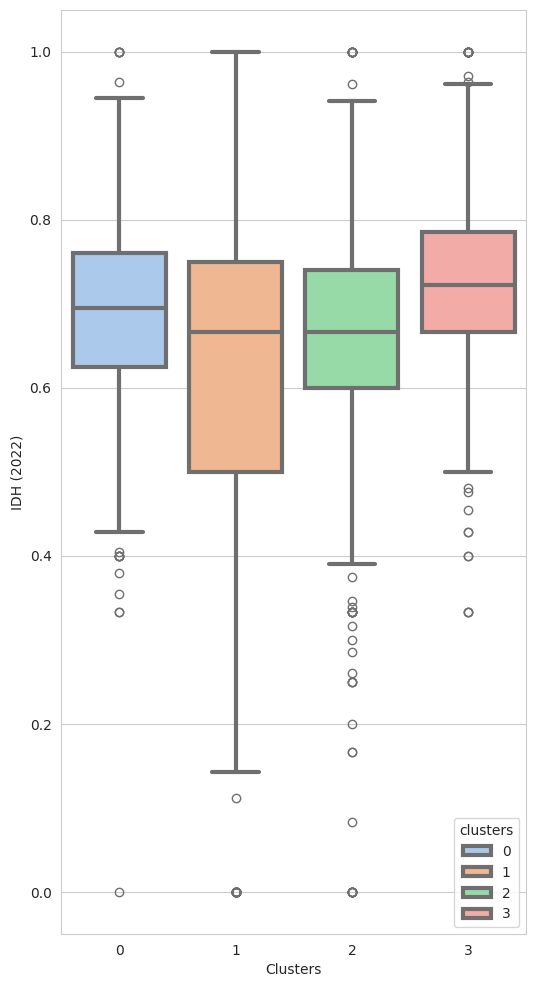

In [ ]:
plt.figure(figsize =(6, 12))

sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x = "clusters", y ="Win %",data = df_kmedoid,
                  hue = "clusters",linewidth=3, palette = "pastel")

# Adicionando Título ao gráfico
plt.xlabel("Clusters")
plt.ylabel("IDH (2022)")

plt.show()

In [ ]:
#preparando barplot
df_barplot['clusters'] = clusters
df_barplot.head()

,wins_x,losses_x,draws_x,height_cm_x,weight_in_kg_x,reach_in_cm_x,stance_x,significant_strikes_landed_per_minute_x,significant_striking_accuracy_x,significant_strikes_absorbed_per_minute_x,...,takedown_defense_x,average_submissions_attempted_per_15_minutes_x,Win %,weight_class_2,idh_nasc,idh_mais_recente,Region,Code,country_y,clusters
0,7,0,0,190.50,92.99,190.50,Orthodox,0.00,0.0,0.00,...,0.0,21.9,1.000000,3,0.889,0.927,North America,USA,United States,2
1,7,4,0,167.64,61.23,167.64,NaN,1.40,33.0,1.40,...,100.0,20.9,0.636364,0,0.889,0.927,North America,USA,United States,3
2,9,7,0,175.26,70.31,175.26,Orthodox,0.00,0.0,4.00,...,0.0,16.4,0.562500,1,0.889,0.927,North America,USA,United States,2
3,12,8,1,198.12,120.20,198.12,Orthodox,0.00,0.0,0.00,...,100.0,14.3,0.595238,8,NaN,NaN,NaN,NaN,England,1
4,9,2,1,190.50,118.39,190.50,NaN,4.69,45.0,0.94,...,100.0,14.1,0.791667,8,0.889,0.927,North America,USA,United States,0


<Axes: xlabel='Region', ylabel='Win %'>

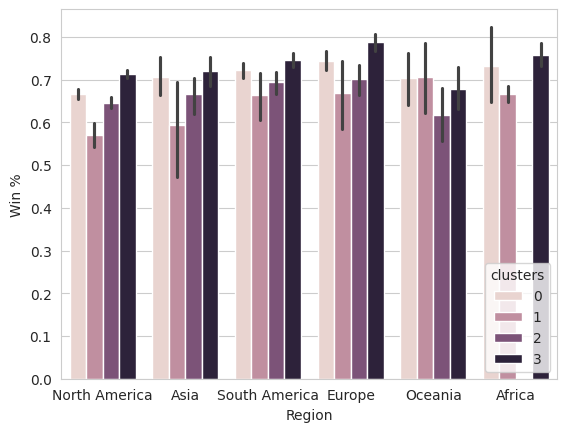

In [ ]:
sns.barplot(df_barplot, x="Region", y="Win %", hue="clusters")

<Axes: xlabel='weight_class_2', ylabel='Win %'>

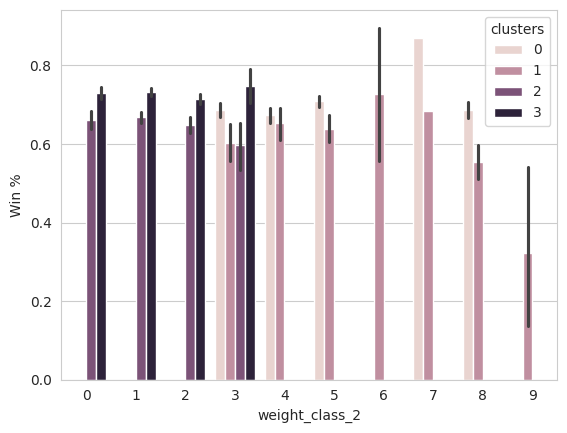

In [ ]:
sns.barplot(df_barplot, x="weight_class_2", y="Win %", hue="clusters")